[*********************100%%**********************]  33 of 33 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=292.118, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=293.551, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=293.449, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=292.958, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.643 seconds


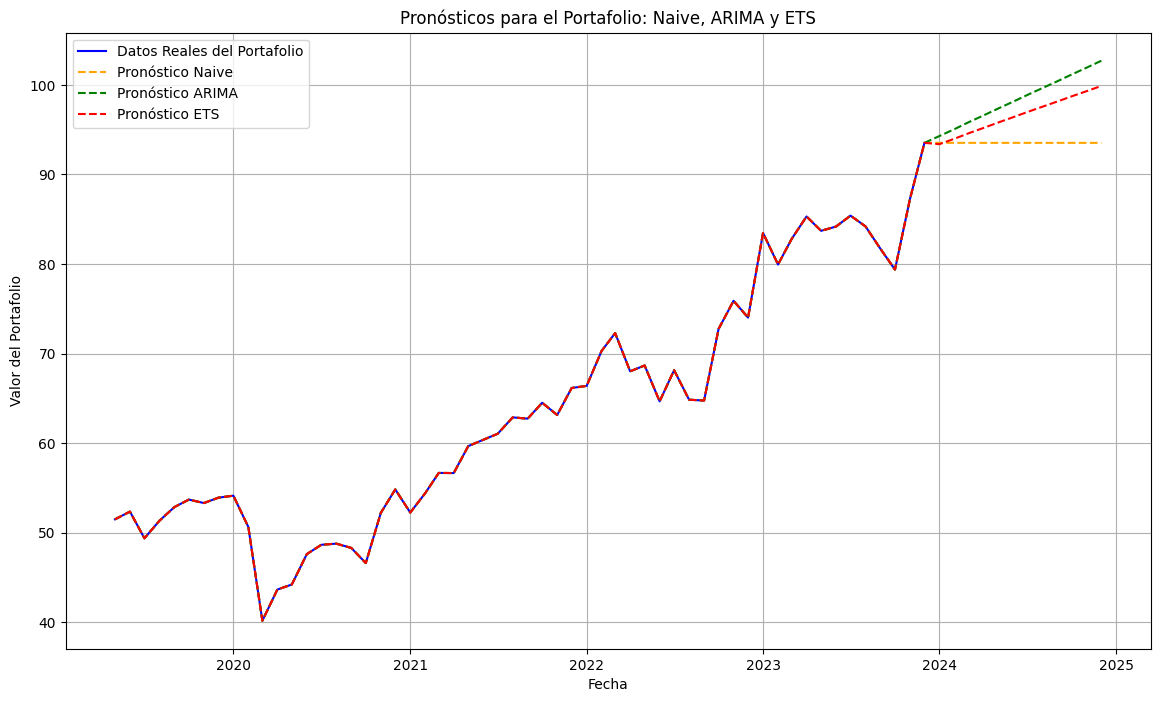

Error Absoluto Medio (MAE) del modelo Naive en datos históricos: 2.52
Modelo ARIMA:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -144.059
Date:                Mon, 02 Dec 2024   AIC                            292.118
Time:                        09:36:40   BIC                            296.132
Sample:                    05-01-2019   HQIC                           293.670
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7646      0.449      1.703      0.089      -0.115       1.644
sigma2        11.0301      1.546      7.134    

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing

tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX", 
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']
portafolio = data.dot(weights)
portafolio = portafolio.dropna()


# Crear un índice de fechas para los próximos 12 meses
horizon = 12  # Número de meses a pronosticar
last_date = portafolio.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=horizon, freq='MS')

# Modelo Naive
naive_last_value = portafolio.iloc[-1]
naive_forecast = pd.Series([naive_last_value] * horizon, index=future_dates)

# Modelo ARIMA
arima_model = auto_arima(portafolio, seasonal=False, trace=True, suppress_warnings=True, stepwise=True)
arima_forecast = pd.Series(arima_model.predict(n_periods=horizon), index=future_dates)

# Modelo ETS
ets_model = ExponentialSmoothing(portafolio, seasonal=None, trend="add", damped_trend=True).fit()
ets_forecast = pd.Series(ets_model.forecast(horizon), index=future_dates)

# Combinar datos históricos y pronósticos
full_naive = pd.concat([portafolio, naive_forecast])
full_arima = pd.concat([portafolio, arima_forecast])
full_ets = pd.concat([portafolio, ets_forecast])

# Gráfica de los resultados
plt.figure(figsize=(14, 8))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue')
plt.plot(full_naive, label='Pronóstico Naive', linestyle='--', color='orange')
plt.plot(full_arima, label='Pronóstico ARIMA', linestyle='--', color='green')
plt.plot(full_ets, label='Pronóstico ETS', linestyle='--', color='red')
plt.title("Pronósticos para el Portafolio: Naive, ARIMA y ETS")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

# Evaluación del modelo Naive (Error absoluto medio en datos históricos)
naive_historical_forecast = portafolio.shift(1)
naive_mae = (portafolio - naive_historical_forecast).abs().mean()

print(f"Error Absoluto Medio (MAE) del modelo Naive en datos históricos: {naive_mae:.2f}")
print(f"Modelo ARIMA: {arima_model.summary()}")


[*********************100%%**********************]  33 of 33 completed


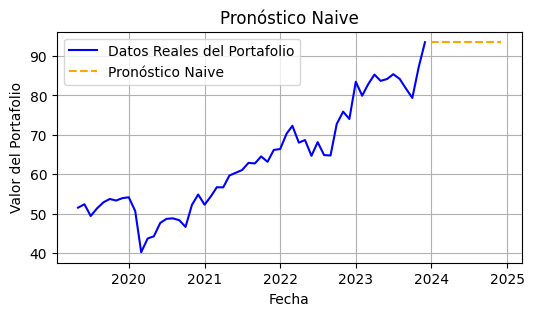

Error Absoluto Medio (MAE) del modelo Naive en datos históricos: 2.52


In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing

tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX", 
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']
portafolio = data.dot(weights)
portafolio = portafolio.dropna()

# Crear un índice de fechas para los próximos 12 meses
horizon = 12  # Número de meses a pronosticar
last_date = portafolio.index[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=horizon, freq='MS')

# Pronóstico Naive
naive_last_value = portafolio.iloc[-1]
naive_forecast = pd.Series([naive_last_value] * horizon, index=future_dates)


# Naive
plt.figure(figsize=(6, 3))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue')
plt.plot(naive_forecast, label='Pronóstico Naive', linestyle='--', color='orange')
plt.title("Pronóstico Naive")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()



# Evaluación del modelo Naive (Error absoluto medio en datos históricos)
naive_historical_forecast = portafolio.shift(1)
naive_mae = (portafolio - naive_historical_forecast).abs().mean()

print(f"Error Absoluto Medio (MAE) del modelo Naive en datos históricos: {naive_mae:.2f}")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=292.118, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=293.551, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=293.449, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=292.958, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.359 seconds


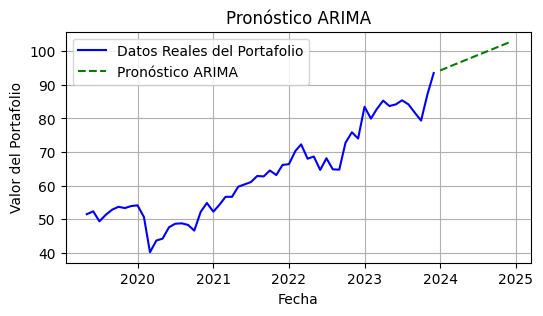

Modelo ARIMA:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -144.059
Date:                Mon, 02 Dec 2024   AIC                            292.118
Time:                        09:56:29   BIC                            296.132
Sample:                    05-01-2019   HQIC                           293.670
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7646      0.449      1.703      0.089      -0.115       1.644
sigma2        11.0301      1.546      7.134      0.000       8.000      14.060
Ljung-Box (L1) (Q):                   

In [42]:
# Pronóstico ARIMA
arima_model = auto_arima(portafolio, seasonal=True, trace=True, suppress_warnings=True, stepwise=True)
arima_forecast = pd.Series(arima_model.predict(n_periods=horizon), index=future_dates)


# ARIMA
plt.figure(figsize=(6, 3))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue')
plt.plot(arima_forecast, label='Pronóstico ARIMA', linestyle='--', color='green')
plt.title("Pronóstico ARIMA")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()
print(f"Modelo ARIMA: {arima_model.summary()}")


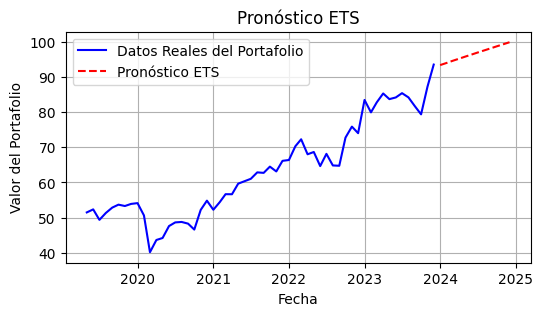

In [44]:
# Pronóstico ETS
ets_model = ExponentialSmoothing(portafolio, seasonal=None, trend="add", damped_trend=True).fit()
ets_forecast = pd.Series(ets_model.forecast(horizon), index=future_dates)

# ETS
plt.figure(figsize=(6, 3))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue')
plt.plot(ets_forecast, label='Pronóstico ETS', linestyle='--', color='red')
plt.title("Pronóstico ETS")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

[*********************100%%**********************]  33 of 33 completed


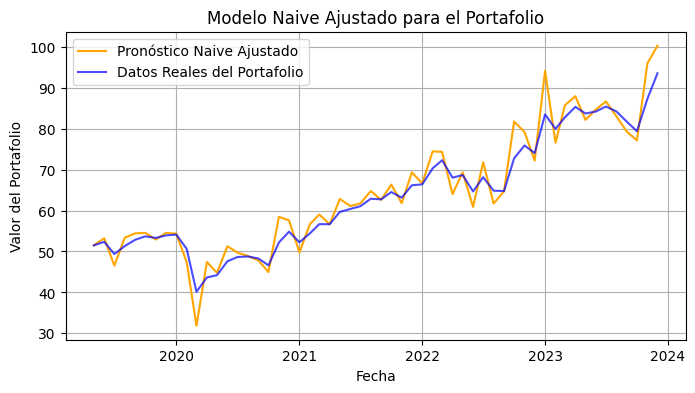

Error Absoluto Medio (MAE) del modelo Naive Ajustado en datos históricos: 2.52


In [71]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definir los tickers y los pesos
tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX", 
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

# Obtenemos los datos históricos
ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']
portafolio = data.dot(weights)
portafolio = portafolio.dropna()

# --- Modelo Naive ajustado ---
naive_adjusted_series = portafolio.copy()

for i in range(1, len(portafolio)):  
    monthly_change = (portafolio.iloc[i] - portafolio.iloc[i - 1]) / portafolio.iloc[i - 1]
    # Ajustamos el valor predicho para el siguiente mes
    next_value = portafolio.iloc[i] * (1 + monthly_change)
    naive_adjusted_series.iloc[i] = next_value


# --- Graficar ---
plt.figure(figsize=(8, 4))
plt.plot(naive_adjusted_series, label='Pronóstico Naive Ajustado', color='orange')
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue', alpha=0.7)
plt.title("Modelo Naive Ajustado para el Portafolio")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

# Evaluación del modelo Naive Ajustado (Error absoluto medio en datos históricos)
naive_adjusted_historical_forecast = portafolio.shift(1)
naive_adjusted_mae = (portafolio - naive_adjusted_historical_forecast).abs().mean()

print(f"Error Absoluto Medio (MAE) del modelo Naive Ajustado en datos históricos: {naive_adjusted_mae:.2f}")


[*********************100%%**********************]  33 of 33 completed


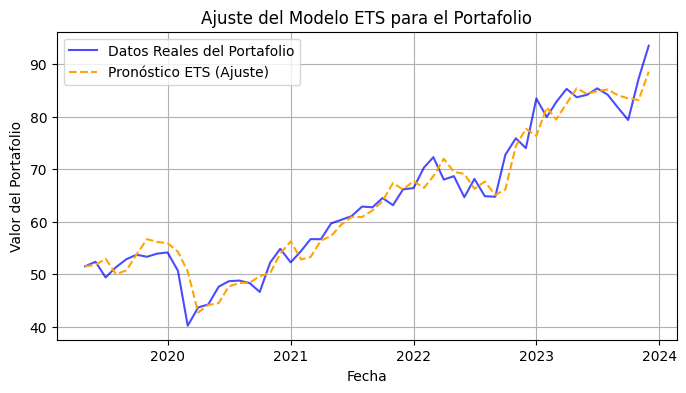

Error Absoluto Medio (MAE) del modelo ETS en datos históricos: 2.32


In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Definir los tickers y los pesos
tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX", 
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

# Obtenemos los datos históricos
ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']
portafolio = data.dot(weights)
portafolio = portafolio.dropna()

# --- Modelo ETS ajustado ---
# Configuramos el modelo ETS, vamos a utilizar aditivo (trend='add', seasonal='add')
ets_model = ExponentialSmoothing(portafolio, trend='add', seasonal='add', seasonal_periods=12)
ets_model_fit = ets_model.fit()

# --- Predicciones para el ajuste histórico ---
historical_forecast_ets = ets_model_fit.fittedvalues

# --- Graficar ---
plt.figure(figsize=(8, 4))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue', alpha=0.7)
plt.plot(historical_forecast_ets, label='Pronóstico ETS (Ajuste)', color='orange', linestyle='--')
plt.title("Ajuste del Modelo ETS para el Portafolio")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

# Evaluación del modelo ETS (Error absoluto medio en datos históricos)
ets_mae = (portafolio - historical_forecast_ets).abs().mean()
print(f"Error Absoluto Medio (MAE) del modelo ETS en datos históricos: {ets_mae:.2f}")


[*********************100%%**********************]  33 of 33 completed


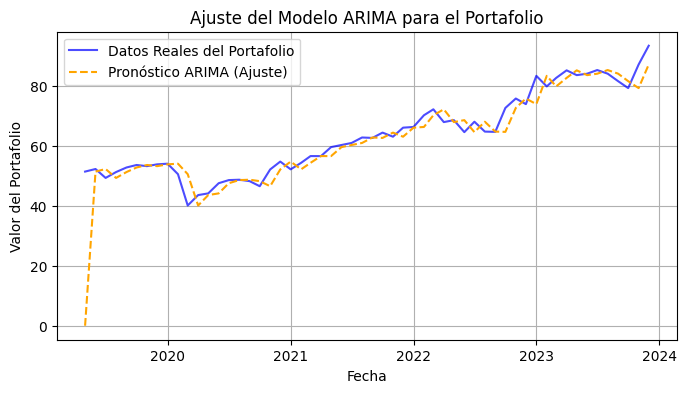

Error Absoluto Medio (MAE) del modelo ARIMA en datos históricos: 3.40


In [66]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Definir los tickers y los pesos
tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX", 
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

# Obtenemos los datos históricos
ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']
portafolio = data.dot(weights)
portafolio = portafolio.dropna()

# --- Modelo ARIMA ajustado ---
# Configuramos el modelo ARIMA
arima_model = ARIMA(portafolio, order=(0, 1, 0))
arima_model_fit = arima_model.fit()

# --- Predicciones para el ajuste histórico ---
historical_forecast = arima_model_fit.predict(start=portafolio.index[0], end=portafolio.index[-1], typ='levels')

# --- Graficar ---
plt.figure(figsize=(8, 4))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue', alpha=0.7)
plt.plot(historical_forecast, label='Pronóstico ARIMA (Ajuste)', color='orange', linestyle='--')
plt.title("Ajuste del Modelo ARIMA para el Portafolio")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

# Evaluación del modelo ARIMA (Error absoluto medio en datos históricos)
arima_mae = (portafolio - historical_forecast).abs().mean()
print(f"Error Absoluto Medio (MAE) del modelo ARIMA en datos históricos: {arima_mae:.2f}")


[*********************100%%**********************]  33 of 33 completed


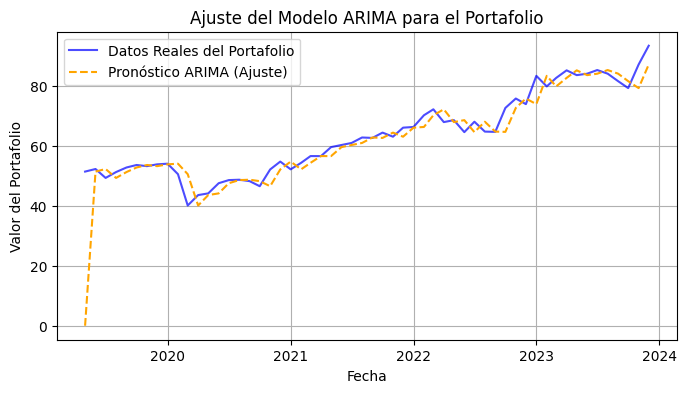

Error Absoluto Medio (MAE) del modelo ARIMA en datos históricos: 3.40


In [72]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Definir los tickers y los pesos
tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX", 
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

# Obtenemos los datos históricos
ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']
portafolio = data.dot(weights)
portafolio = portafolio.dropna()

# --- Modelo ARIMA ajustado ---
# Configuramos el modelo ARIMA
arima_model = ARIMA(portafolio, order=(0, 1, 0))  # (p, d, q)
arima_model_fit = arima_model.fit()

# --- Predicciones para el ajuste histórico ---
historical_forecast = arima_model_fit.predict(start=portafolio.index[0], end=portafolio.index[-1], typ='levels')

# Ajustar el índice de las predicciones para que coincida con los datos originales
historical_forecast.index = portafolio.index

# --- Graficar ---
plt.figure(figsize=(8, 4))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue', alpha=0.7)
plt.plot(historical_forecast, label='Pronóstico ARIMA (Ajuste)', color='orange', linestyle='--')
plt.title("Ajuste del Modelo ARIMA para el Portafolio")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

# Evaluación del modelo ARIMA (Error absoluto medio en datos históricos)
arima_mae = (portafolio - historical_forecast).abs().mean()
print(f"Error Absoluto Medio (MAE) del modelo ARIMA en datos históricos: {arima_mae:.2f}")


[*********************100%%**********************]  33 of 33 completed


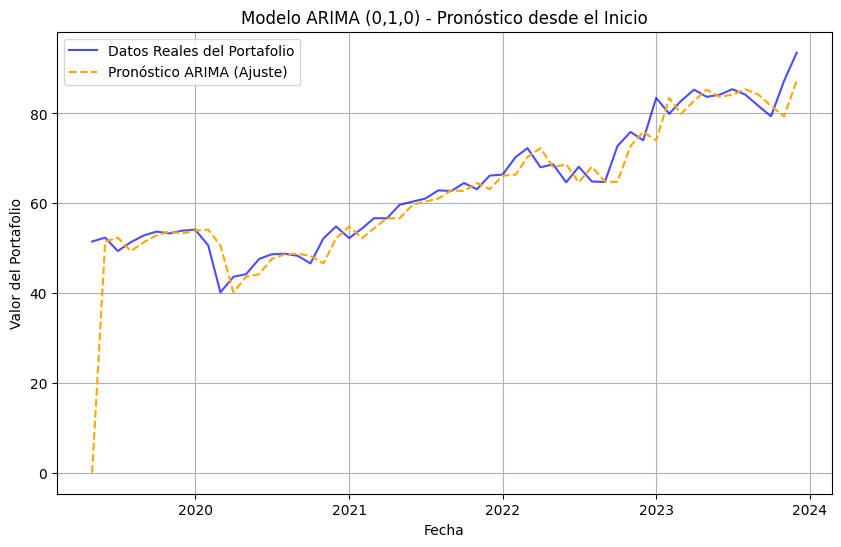

Error Absoluto Medio (MAE): 3.40


In [74]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Definir los tickers y los pesos
tickers = ["AMXB.MX", "WALMEX.MX", "FEMSAUBD.MX", "GMEXICOB.MX", "GFNORTEO.MX", 
           "BIMBOA.MX", "TLEVISACPO.MX", "KIMBERA.MX", "CEMEXCPO.MX", "CHDRAUIB.MX",
           "MEGACPO.MX", "LABB.MX", "CUERVO.MX", "GRUMAB.MX", "ALSEA.MX",
           "GFINBURO.MX", "OMAB.MX", "ASURB.MX", "AC.MX", "GCARSOA1.MX",
           "BBAJIOO.MX", "GAPB.MX", "BOLSAA.MX", "PINFRA.MX", "ALFAA.MX",
           "LIVEPOLC-1.MX", "PE&OLES.MX", "KOFUBL.MX", "VESTA.MX", "GCC.MX",
           "ORBIA.MX", "Q.MX", "RA.MX"]

weights = [0.0908, 0.0866, 0.0999, 0.0204, 0.0179, 0.036, 0.0953, 0.0157, 0.0649, 0.0085,
           0.0085, 0.0105, 0.0051, 0.0094, 0.0113, 0.1062, 0.0202, 0.0428, 0.0262, 0.0337,
           0.0155, 0.0159, 0.0049, 0.0112, 0.0129, 0.0091, 0.0097, 0.0217, 0.0164, 0.0185,
           0.0093, 0.0153, 0.0067]

# Obtener los datos históricos
ticker = yf.Tickers(tickers)
data = ticker.history(start='2015-01-01', end='2023-12-31', interval='1mo')['Close']
portafolio = data.dot(weights)
portafolio = portafolio.dropna()

# Modelo ARIMA (0,1,0) ajustado a todos los datos
arima_model = ARIMA(portafolio, order=(0, 1, 0))
arima_model_fit = arima_model.fit()

# Predicción para todo el rango de datos
historical_forecast = arima_model_fit.predict(start=portafolio.index[0], end=portafolio.index[-1], typ='levels')

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(portafolio, label='Datos Reales del Portafolio', color='blue', alpha=0.7)
plt.plot(historical_forecast, label='Pronóstico ARIMA (Ajuste)', color='orange', linestyle='--')
plt.title("Modelo ARIMA (0,1,0) - Pronóstico desde el Inicio")
plt.xlabel("Fecha")
plt.ylabel("Valor del Portafolio")
plt.legend()
plt.grid()
plt.show()

# Evaluación del modelo
mae = (portafolio - historical_forecast).abs().mean()
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
